# Imports

We need a few libraries to help the development of this project.

In [25]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

# Building the dataset

Now we create a dataset with the information in the `match_data_v5.csv`, set the name of each column and drop the `matchID` and `empty` columns, since they are not relevant to the analysis.

In [26]:
data = pd.read_csv('match_data_v5.csv')
data.columns = ["matchID","blueTeamControlWardsPlaced","blueTeamWardsPlaced","blueTeamTotalKills","blueTeamDragonKills","blueTeamHeraldKills","blueTeamTowersDestroyed","blueTeamInhibitorsDestroyed","blueTeamTurretPlatesDestroyed","blueTeamFirstBlood","blueTeamMinionsKilled","blueTeamJungleMinions","blueTeamTotalGold","blueTeamXp","blueTeamTotalDamageToChamps",
                            "redTeamControlWardsPlaced","redTeamWardsPlaced","redTeamTotalKills","redTeamDragonKills","redTeamHeraldKills","redTeamTowersDestroyed","redTeamInhibitorsDestroyed","redTeamTurretPlatesDestroyed","redTeamMinionsKilled","redTeamJungleMinions","redTeamTotalGold","redTeamXp","redTeamTotalDamageToChamps","blueWin","empty"]
data = data.drop(columns=["matchID","empty"])
data.head()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
0,2,23,4,2,0,0,0,7,0,388,...,0,2,0,1,400,94,29637,32613,27239,1
1,2,46,12,1,0,1,0,10,0,348,...,0,1,0,4,373,76,28970,30320,36585,0
2,2,19,13,0,0,0,0,11,0,331,...,0,2,0,3,340,84,30510,29464,42984,0
3,3,28,8,0,1,1,0,9,1,355,...,0,0,0,5,378,87,25157,31069,28229,0
4,3,30,11,1,1,1,0,7,0,370,...,0,1,0,5,382,96,26052,29475,19245,1


In [27]:
data.describe()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
count,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,...,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.00000
mean,3.610815,41.362023,12.792487,0.737833,0.123591,0.654902,0.002023,8.915789,0.503860,349.240578,...,0.103117,0.955088,0.001527,3.884045,350.287554,88.547368,27788.709391,29619.035789,32156.531682,0.49453
std,2.018622,43.471913,4.910510,0.722126,0.329247,0.885749,0.054101,3.083976,0.499995,31.339593,...,0.304117,0.981776,0.044021,2.591134,31.593160,14.120346,2694.330794,1896.275564,6041.175604,0.49998
min,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.000000,...,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,18247.000000,17602.000000,10383.000000,0.00000
25%,2.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,329.000000,...,0.000000,0.000000,0.000000,2.000000,330.000000,79.000000,25910.000000,28387.000000,28024.000000,0.00000
50%,3.000000,29.000000,12.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,350.000000,...,0.000000,1.000000,0.000000,4.000000,351.000000,88.000000,27629.000000,29632.000000,31938.000000,0.00000
75%,5.000000,35.000000,16.000000,1.000000,0.000000,1.000000,0.000000,11.000000,1.000000,371.000000,...,0.000000,1.000000,0.000000,5.000000,372.000000,98.000000,29514.000000,30866.000000,36029.000000,1.00000
max,37.000000,603.000000,38.000000,2.000000,2.000000,10.000000,2.000000,22.000000,1.000000,465.000000,...,1.000000,10.000000,2.000000,15.000000,464.000000,156.000000,41227.000000,36797.000000,62452.000000,1.00000


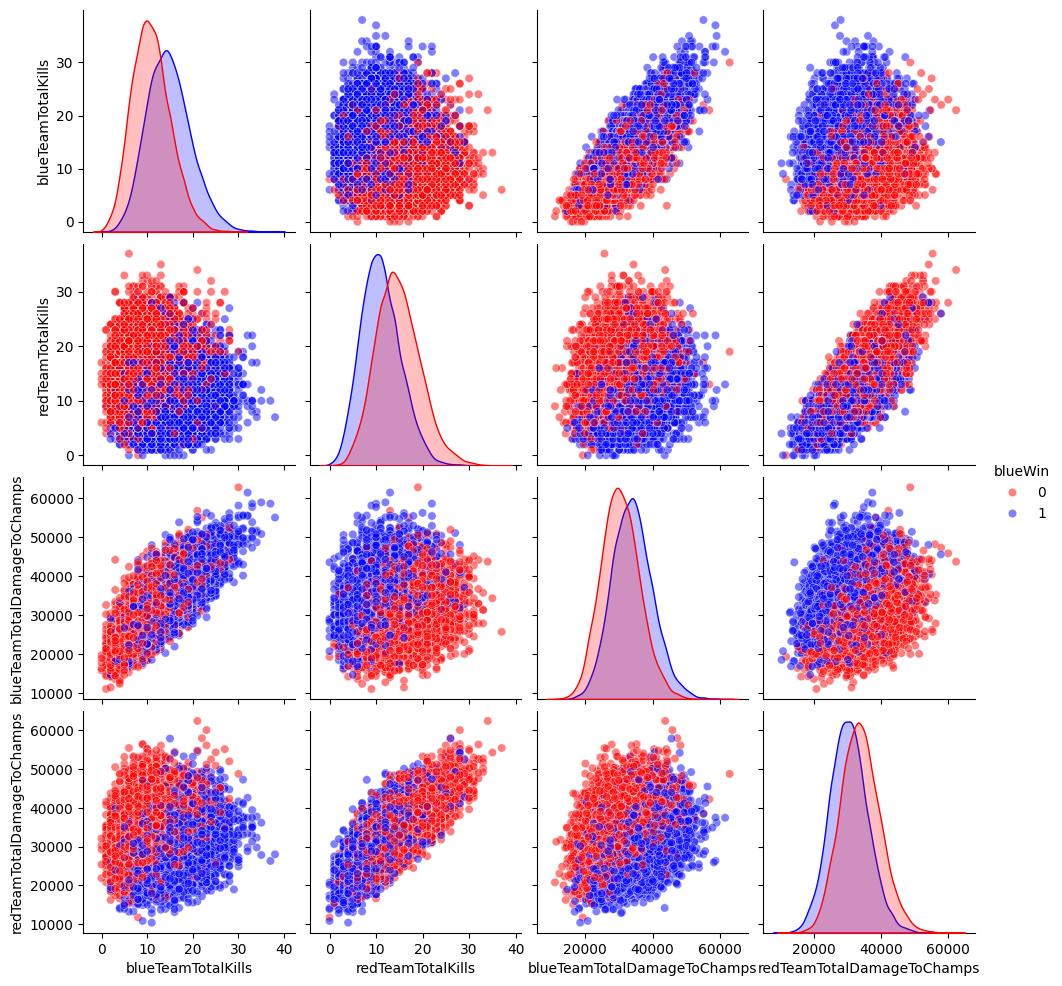

In [33]:
sample_size = data.__len__()
variables = ['blueTeamTotalKills', 'redTeamTotalKills', 'blueTeamTotalDamageToChamps', 'redTeamTotalDamageToChamps', 'blueWin']

# Sample the data
sample = data.sample(sample_size)[variables]

palette = {0: 'red', 1: 'blue'}
sb.pairplot(sample, hue='blueWin', palette=palette, plot_kws={'alpha': 0.5})

We are trying to find a correlation between game states and whether or not they lead to a victory.
In this case, `Red` means the `Blue` team lost, whereas `Blue` means the `Blue` team won.

From these graphs, we can see some contributing factors to a win:

- Total kills:
    If we compare `redTeamTotalKills` and `blueTeamTotalKills`, we can see that games are mostly won by the teams with more kills.
- Total Damage to Champions:
    Much like total kills, it appears as if the team with most total damage to champions tends to win the game.
    The graph comparing each team's total damage to champions is quite similar to the graph comparing total kills. This is because these two variables are very entertwined, since, generally, dealing damage to enemy champions may result in their death.